<a href="https://colab.research.google.com/github/sprashant19/Customer-Churn-Prediction/blob/main/Customer_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the data
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Get information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#Total Charges is in String format, we need to convert it into float format.
data['TotalCharges'] =pd.to_numeric(data['TotalCharges'],errors='coerce')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Check for missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The total Charges column has 11 null values that can be removed and it won't affect the data at all.

In [7]:
#Dropping the rows that contain null values
data = data.dropna(subset=['TotalCharges'])
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#Drop  the unnecessary columns
data = data.drop(columns=['customerID'])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Outlier detection

In [9]:
min_threshold,max_threshold = data.tenure.quantile([0.001,0.999])
min_threshold,max_threshold

(1.0, 72.0)

In [10]:
data = data[(data.tenure<68)&(data.tenure>min_threshold)]
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,Female,0,No,No,12,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.30,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
min_threshold,max_threshold = data.MonthlyCharges.quantile([0.001,0.999])
min_threshold,max_threshold

(18.7786, 116.25)

# Exploratory Data Analysis

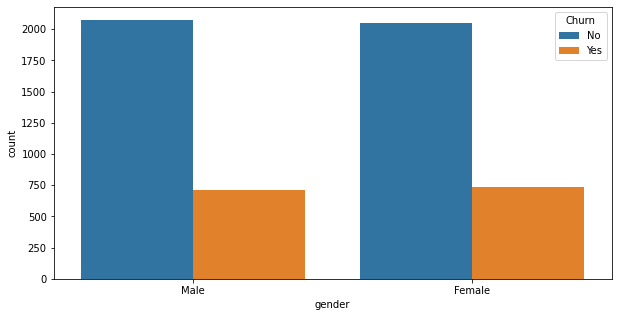

In [12]:
#plotting Gender VS Churn
plt.figure(figsize=(10,5))
sns.countplot(x='gender',hue='Churn',data=data)
plt.show()

The above figure depicts that number of Churn is less for males compared to females. But the number of cutomers using the connection is more than those who churn.

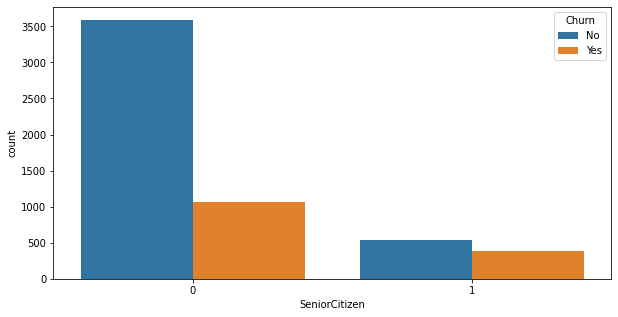

In [13]:
#plotting SeniorCitizen  VS Churn
plt.figure(figsize=(10,5))
sns.countplot(x='SeniorCitizen',hue='Churn',data=data)
plt.show()

Senior Citizen's are more likely Churn, than the young adults as the above figure depicts.

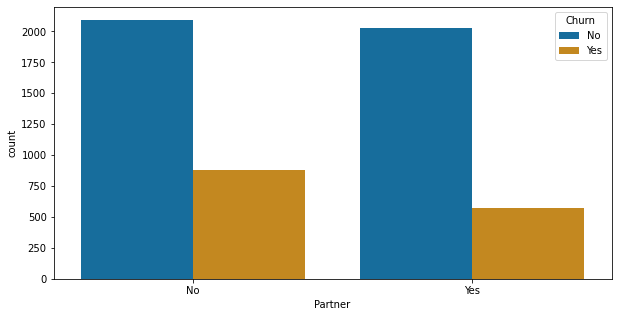

In [14]:
#plotting Partner  VS Churn
sns.set_palette('colorblind')
plt.figure(figsize=(10,5))
sns.countplot(x='Partner',hue='Churn',data=data)
plt.show()

Cusotmers who is married or has a partner are less likely to churn.Whereas those who don't have partners are more likely to Churn as depicted above.

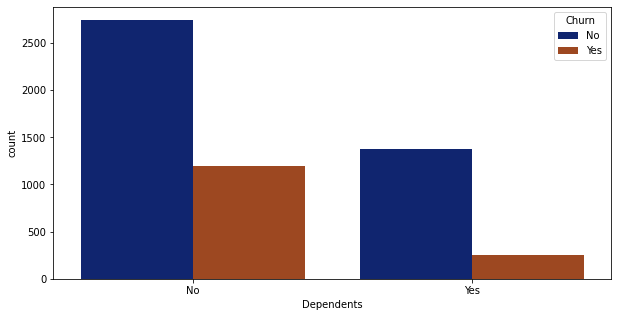

In [15]:
#plotting Dependents  VS Churn
sns.set_palette('dark')
plt.figure(figsize=(10,5))
sns.countplot(x='Dependents',hue='Churn',data=data)
plt.show()

Cusotmers who has dependents are less likely to churn.Whereas those who don't have dependents are more likely to Churn as depicted above.

<Axes: title={'center': 'tenure'}, xlabel='Churn'>

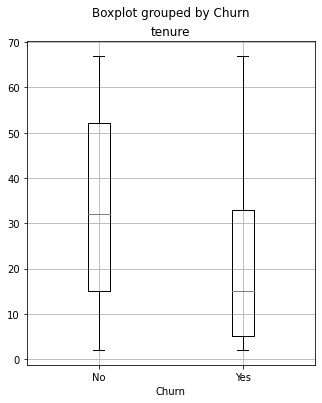

In [16]:
#Boxplot for tenure VS Churn
data.boxplot(column='tenure',by='Churn',figsize=(5,6))

More than 50% of the cutomers Churn who have used the sevice for more than 30 years, whereas the cutomers who have used the service for more than 50 years are less likely to churn as depicted in the above box plot.

<Axes: title={'center': 'MonthlyCharges'}, xlabel='Churn'>

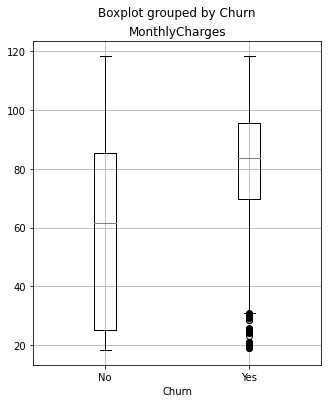

In [17]:
data.boxplot(column='MonthlyCharges',by='Churn',figsize=(5,6))

Customers whose monthly charge is more than 50, has been churning as shown above. Also those who pay a monthly charge wihtin 20- 80 are less likely churn.

<Axes: title={'center': 'TotalCharges'}, xlabel='Churn'>

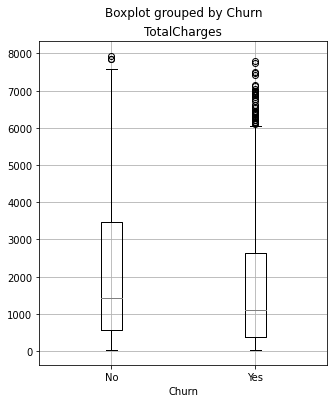

In [18]:
data.boxplot(column='TotalCharges',by='Churn',figsize=(5,6)) #Boxplot for TotalCharges

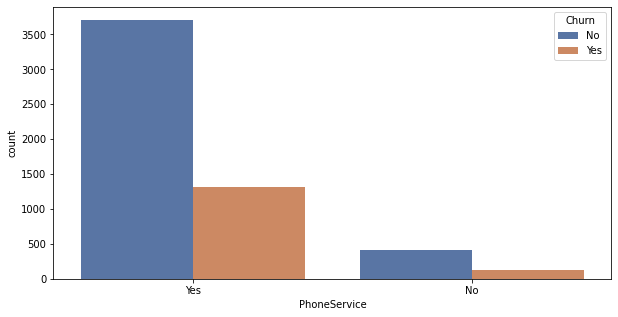

In [19]:
#plotting PhoneService  VS Churn
sns.set_palette('deep')
plt.figure(figsize=(10,5))
sns.countplot(x='PhoneService',hue='Churn',data=data)
plt.show()

As the above plot shows, the data has more number of people who have phone service and within this, it is shown they are less likely to churn.

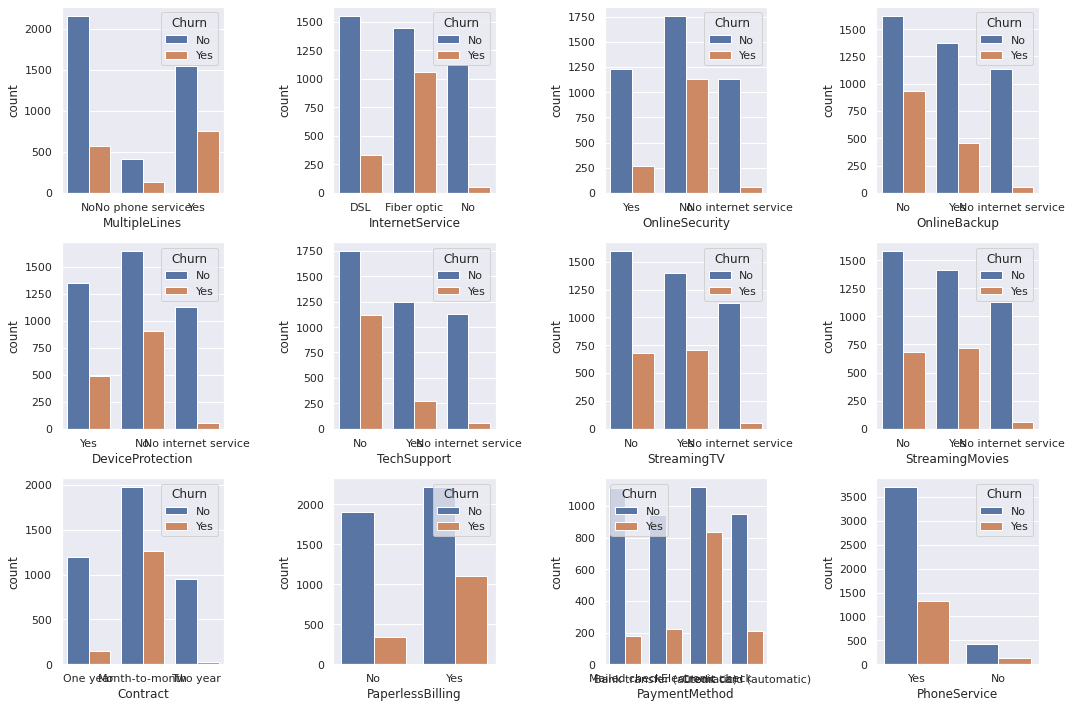

In [20]:
sns.set()
#Set the figure size and adjust the padding between and around the subplots.
plt.rcParams["figure.figsize"] = [15, 10] 
plt.rcParams["figure.autolayout"] = True

#Subplot with 2 rows and 3 columns
fig,axes = plt.subplots(3,4)
                                   \

#Creating the subplots

sns.countplot(x='MultipleLines',hue='Churn',data=data,ax=axes[0,0])
sns.countplot(x='InternetService',hue='Churn',data=data,ax=axes[0,1])
sns.countplot(x='OnlineSecurity',hue='Churn',data=data,ax=axes[0,2])
sns.countplot(x='OnlineBackup',hue='Churn',data=data,ax=axes[0,3])
sns.countplot(x='DeviceProtection',hue='Churn',data=data,ax=axes[1,0])
sns.countplot(x='TechSupport',hue='Churn',data=data,ax=axes[1,1])
sns.countplot(x='StreamingTV',hue='Churn',data=data,ax=axes[1,2])
sns.countplot(x='StreamingMovies',hue='Churn',data=data,ax=axes[1,3])
sns.countplot(x='Contract',hue='Churn',data=data,ax=axes[2,0])
sns.countplot(x='PaperlessBilling',hue='Churn',data=data,ax=axes[2,1])
sns.countplot(x='PaymentMethod',hue='Churn',data=data,ax=axes[2,2])
sns.countplot(x='PhoneService',hue='Churn',data=data,ax=axes[2,3])


plt.show()

# Encoding the Columns

In [21]:
#Importing the necessary modules for encoding

from sklearn import preprocessing   
le=preprocessing.LabelEncoder()

Columns =['gender','Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

data[Columns]=data[Columns].apply(le.fit_transform)

<ipython-input-21-01dba09a82b6>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[Columns]=data[Columns].apply(le.fit_transform)


In [22]:
data['Churn'] = data['Churn'].map({'Yes':1,'No':0})

<ipython-input-22-e3055bf5ff39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Churn'] = data['Churn'].map({'Yes':1,'No':0})


In [23]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,1,0,0,0,32,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,43,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,6,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,0,0,0,0,10,0,1,0,0,2,2,2,2,2,1,0,2,60.65,743.30,0
7038,1,0,1,1,22,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7040,0,0,1,1,9,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,2,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


#Preparing the Data

In [24]:
x = data[['gender', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'SeniorCitizen', 'TotalCharges']].values
y = data['Churn'].values

# Splitting the Data

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Scaling the Data

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Model Building

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [28]:
#Prediction

log_reg.predict(x_test_scaled)

array([0, 0, 0, ..., 0, 1, 0])

In [29]:
df_pred=pd.DataFrame({'Actual':y_test,'Predicted':log_reg.predict(x_test_scaled)})
df_pred

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1389,1,1
1390,0,1
1391,1,0
1392,1,1


# Evaluation Metrics

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,log_reg.predict(x_test_scaled))

0.6897593982860099